Yash Sarfare 21102A0070 CMPN A

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib  # For saving and loading the model

In [ ]:
housing_df = pd.read_csv('housing.csv')

In [ ]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing_df.shape

(20640, 10)

In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [ ]:
len(housing_df[housing_df.total_bedrooms.isna()])

207

In [ ]:
# Check for missing values
housing_df.isnull().sum()

# Fill missing values in 'total_bedrooms' with the median value
housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)

# Verify that there are no more missing values
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
x_features = housing_df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
              'ocean_proximity']]
y_target = housing_df['median_house_value']

In [ ]:
housing_df.reset_index(inplace=True,drop=True)
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
x_features['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
x_features = x_features.join(pd.get_dummies(x_features["ocean_proximity"], prefix="ocean_prox_"))

In [ ]:
x_features = x_features.drop("ocean_proximity", axis = 1)

In [ ]:
x_features.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_prox__<1H OCEAN,ocean_prox__INLAND,ocean_prox__ISLAND,ocean_prox__NEAR BAY,ocean_prox__NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [ ]:
le=LabelEncoder()
housing_df['ocean_proximity']=le.fit_transform(housing_df['ocean_proximity'])
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
housing_df["population_per_household"]=housing_df["population"]/housing_df["households"]

In [ ]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,5.329513,0.219892,2.123209


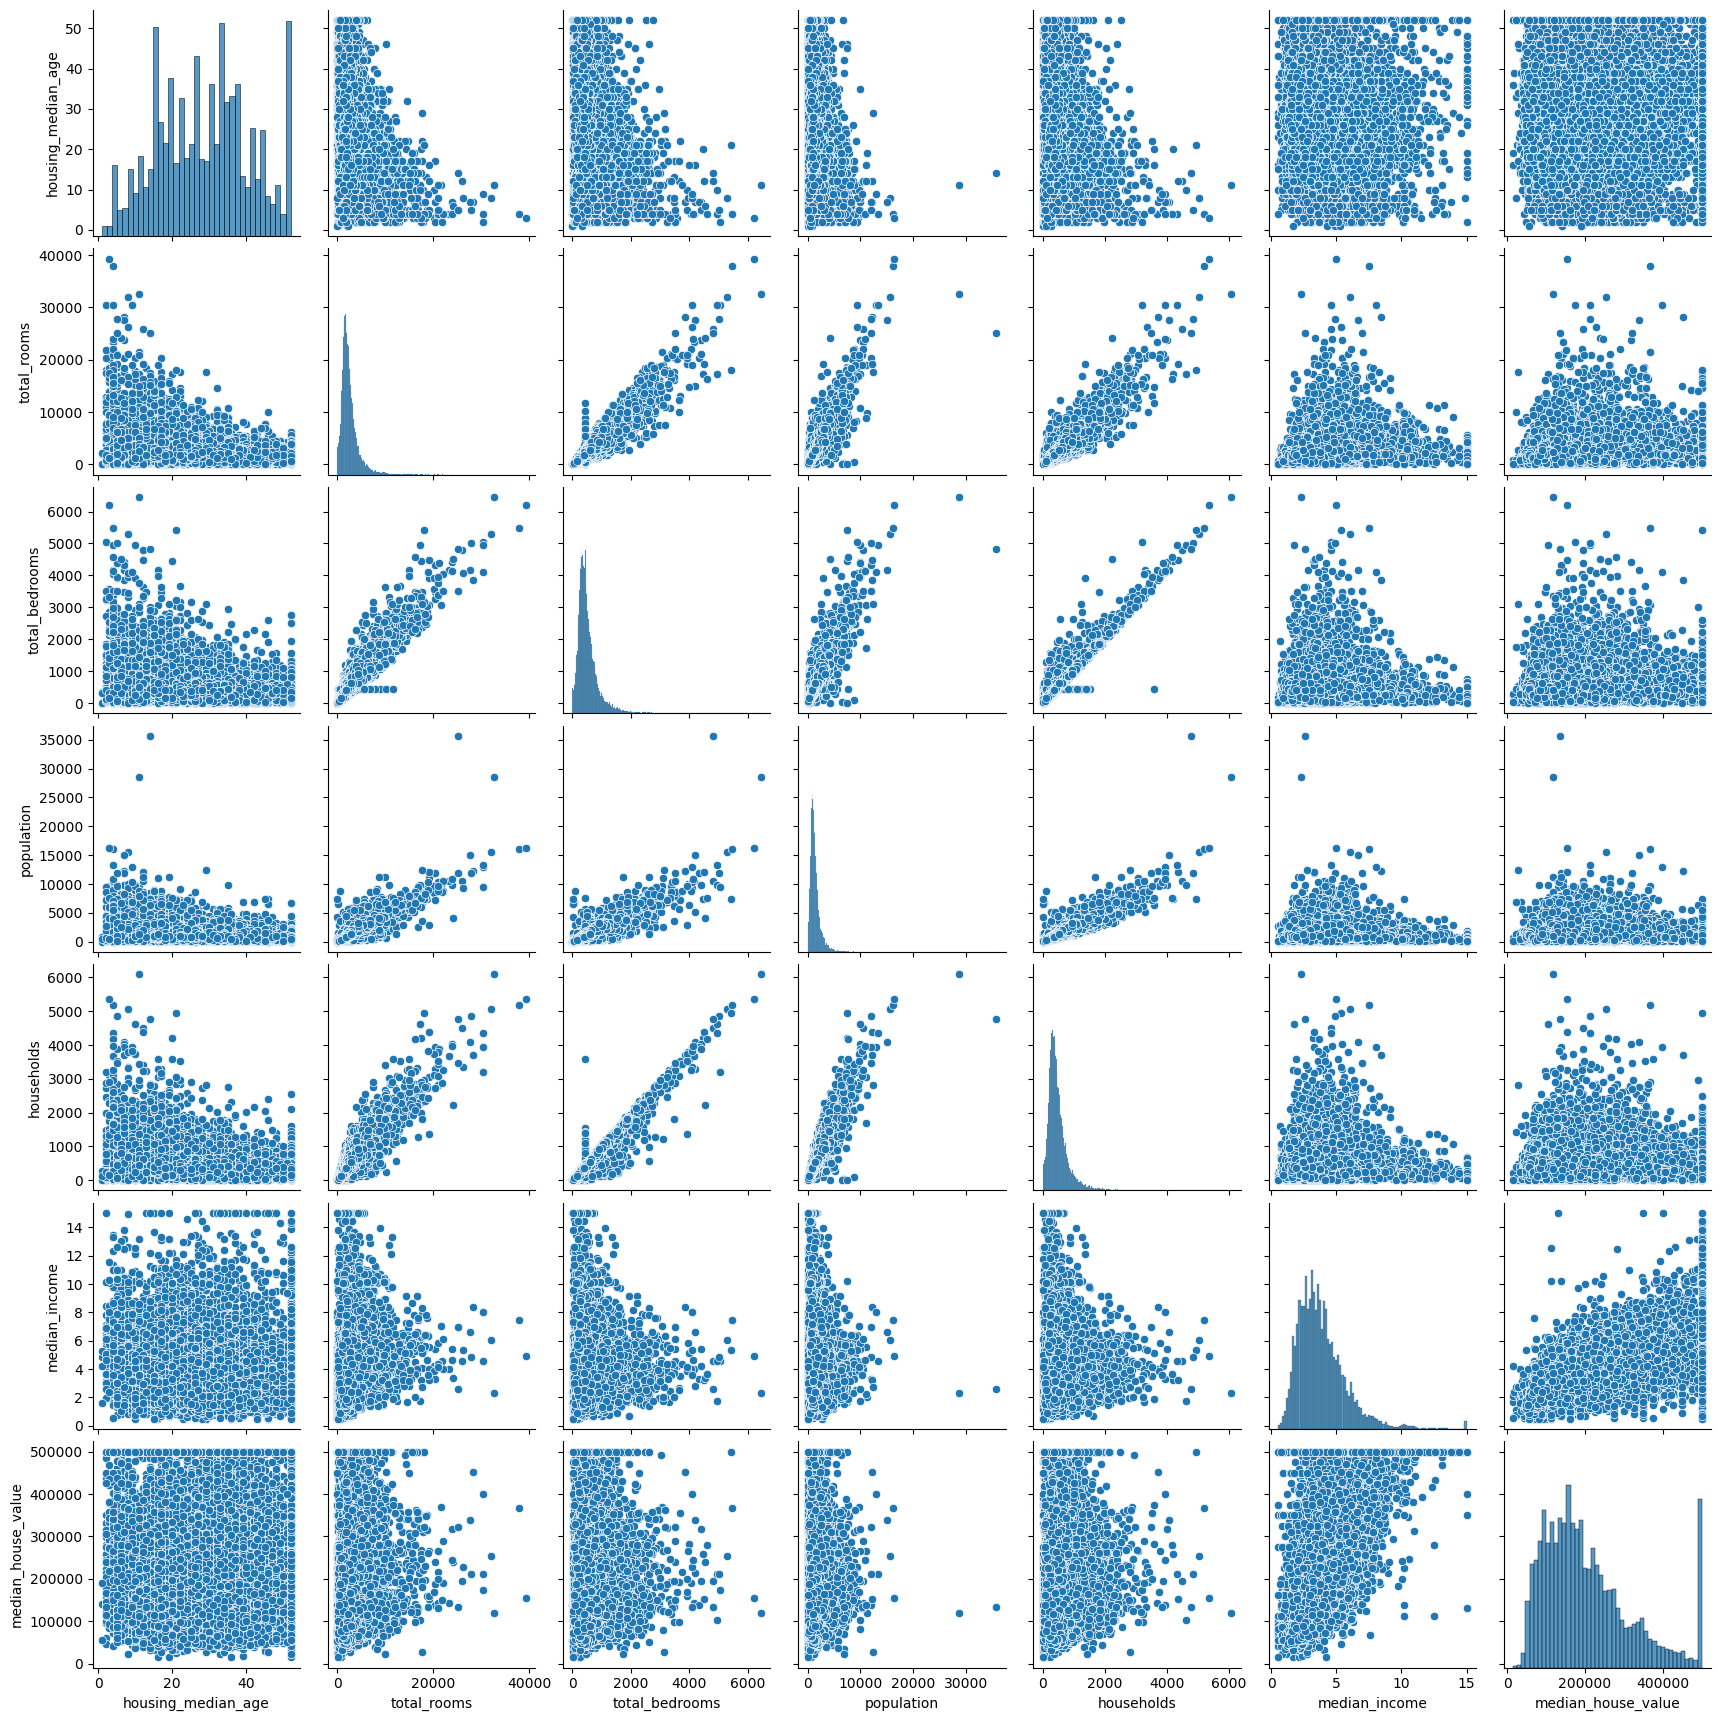

In [ ]:
sns.pairplot(housing_df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
              'median_house_value']])
plt.show()

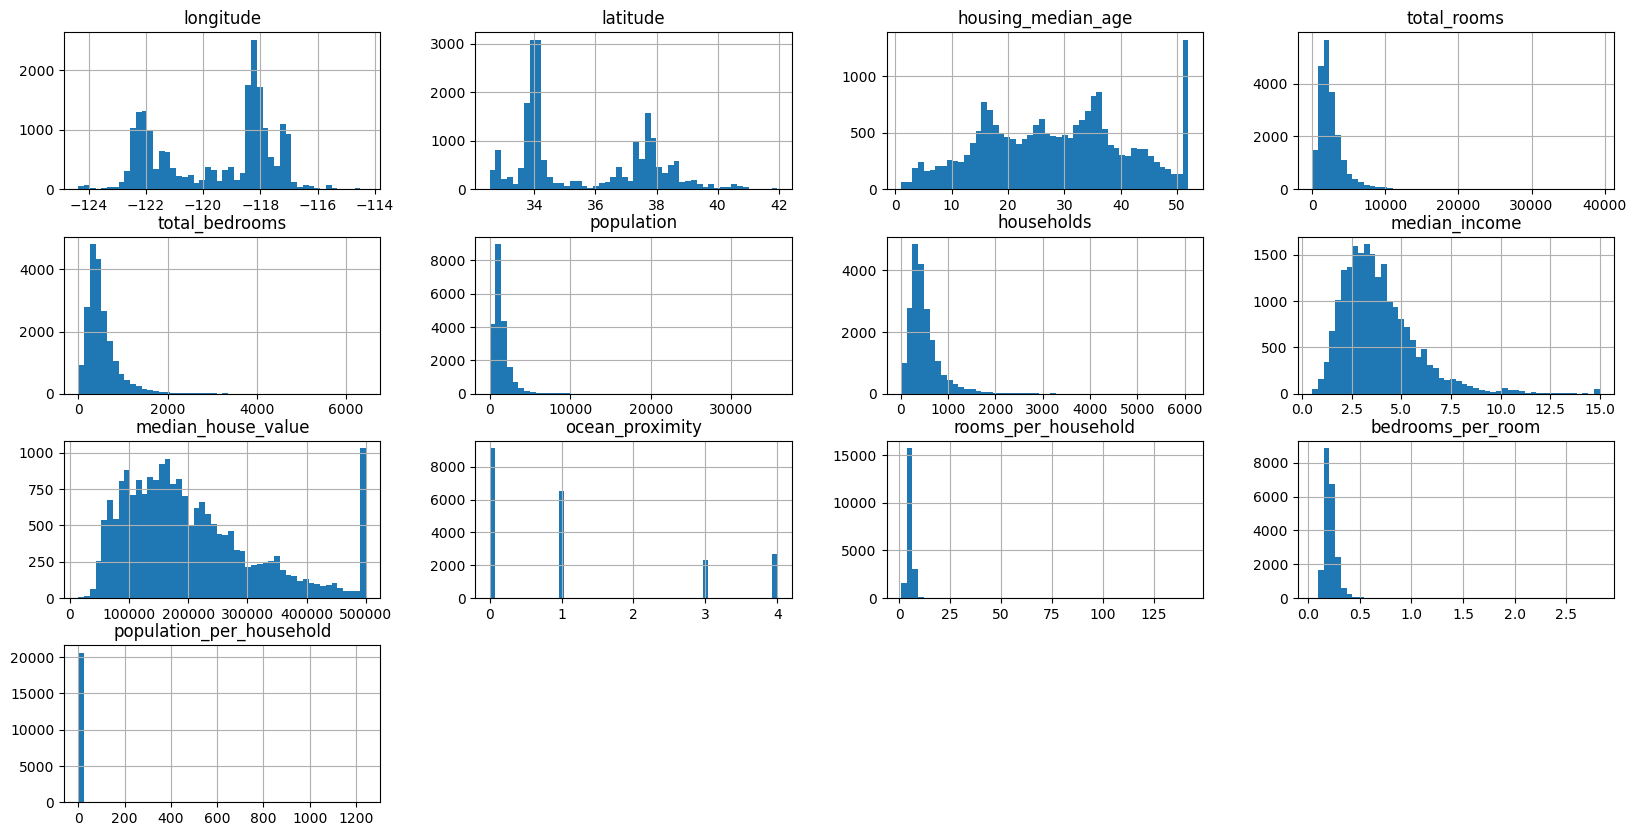

In [ ]:
housing_df.hist(bins=50,figsize=(20,10));

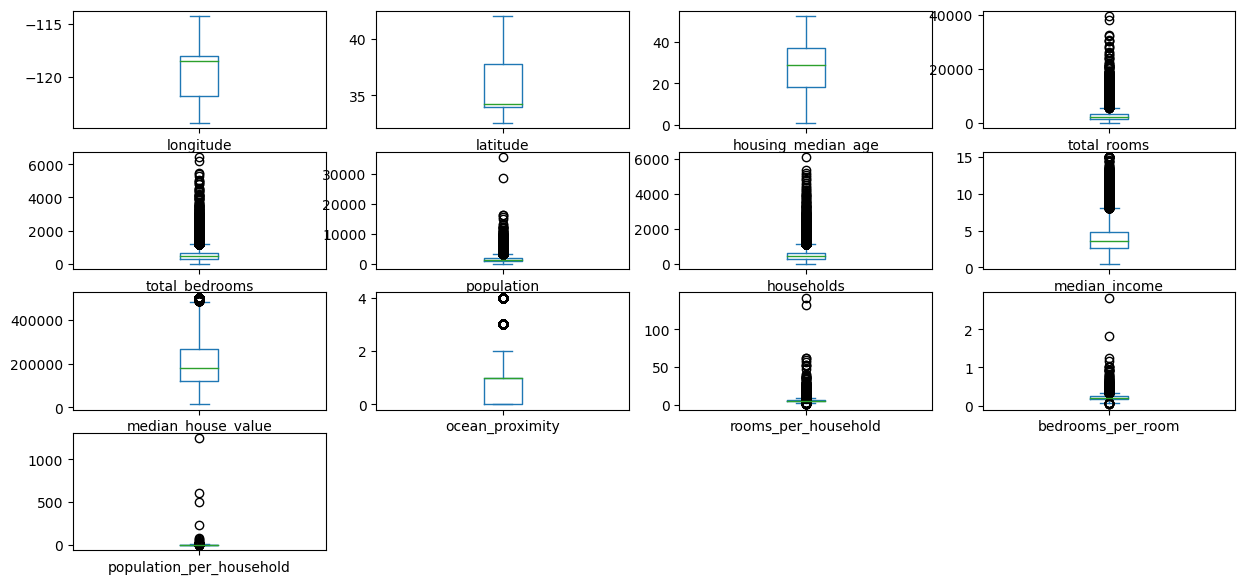

In [ ]:
housing_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

In [ ]:
corr_df = housing_df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
              'median_house_value']].corr()
corr_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


In [ ]:
housing_df["total_bedrooms"]=housing_df["total_bedrooms"].fillna(np.mean(housing_df.total_bedrooms))
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  int32  
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), int32(1)
memory usage: 2.0 MB


<AxesSubplot:>

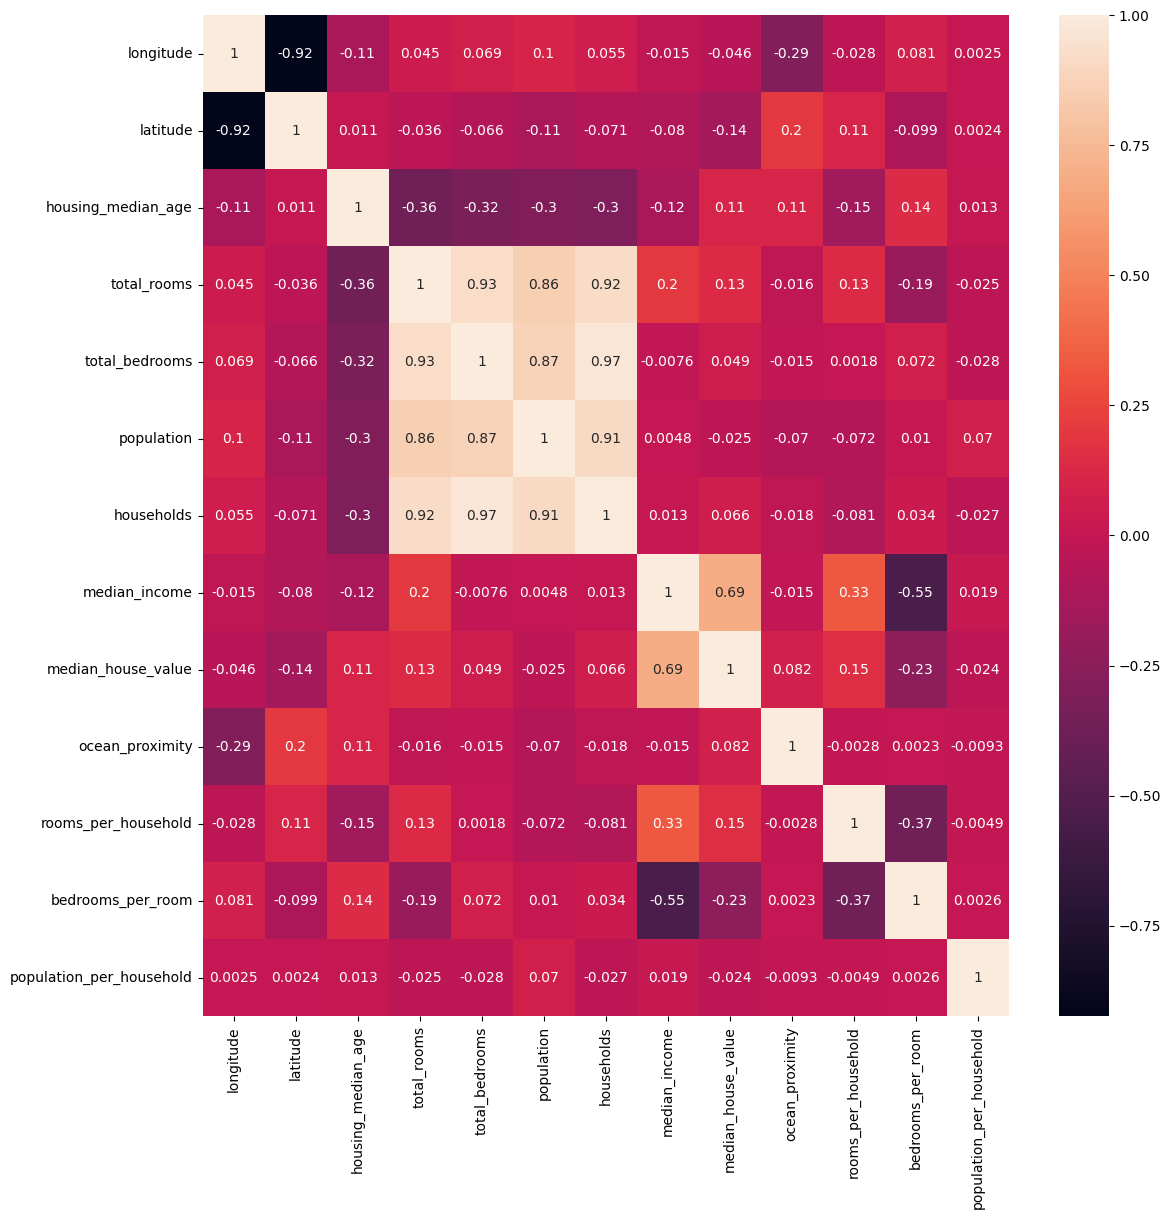

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(housing_df.corr(),annot=True)

In [ ]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,5.329513,0.219892,2.123209


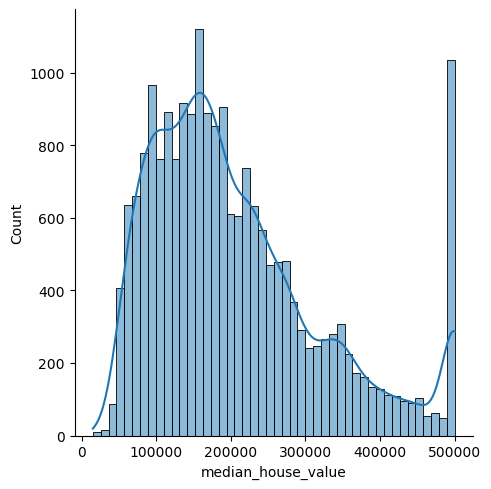

In [ ]:
sns.displot(housing_df["median_house_value"],kde=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_features,y_target,test_size=0.2,random_state=47)

In [ ]:
#Print the shape of the Original and Test train data splits
print(x_features.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20640, 11)
(16512, 11)
(4128, 11)
(16512,)
(4128,)


In [ ]:
#import linear regression class and create the estimator object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
lm.intercept_

55554.47841148873

In [ ]:
lm.score(x_train , y_train)

0.6339015304705975

In [ ]:
lm.score(x_test , y_test)

0.631310412163876

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,index=x_train.columns,columns=["Coefficients"])
coeff_df

,Coefficients
housing_median_age,1151.059412
total_rooms,-5.610348
total_bedrooms,54.923489
population,-43.091851
households,111.750662
median_income,39663.240678
ocean_prox__<1H OCEAN,-24616.015259
ocean_prox__INLAND,-93315.016426
ocean_prox__ISLAND,150847.355246
ocean_prox__NEAR BAY,-21507.834136


In [ ]:
predicted_housing_value = lm.predict(x_test)

In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,predicted_housing_value)
rmse = np.sqrt(mse)
print( "The mean squared error of the model is " , mse)
print( "The Root- mean squared error of the model is " , rmse)

The mean squared error of the model is  5024756551.22101
The Root- mean squared error of the model is  70885.51721770118


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
x_train_std_df = pd.DataFrame(x_train_std, columns=x_features.columns)
x_train_std_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_prox__<1H OCEAN,ocean_prox__INLAND,ocean_prox__ISLAND,ocean_prox__NEAR BAY,ocean_prox__NEAR OCEAN
0,-1.562172,-0.768710,-0.888791,-0.749814,-0.909508,-0.364751,1.122938,-0.682385,-0.017404,-0.354564,-0.383179
1,-1.005349,-0.024404,0.573015,-0.265597,0.594078,-0.258200,-0.890522,-0.682385,-0.017404,-0.354564,2.609748
2,0.267389,-0.636950,-0.866937,-0.829760,-0.845639,-0.109336,-0.890522,1.465449,-0.017404,-0.354564,-0.383179
3,0.585573,-0.568733,-0.641110,-0.380973,-0.576856,-0.077904,-0.890522,-0.682385,-0.017404,2.820363,-0.383179
4,-1.005349,0.156884,0.881403,0.121414,0.791008,-0.683188,1.122938,-0.682385,-0.017404,-0.354564,-0.383179
...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.209888,0.456849,0.483170,1.075313,0.548837,-0.410340,1.122938,-0.682385,-0.017404,-0.354564,-0.383179
16508,-0.209888,-0.286523,0.038800,-0.688038,0.032562,-0.846738,1.122938,-0.682385,-0.017404,-0.354564,-0.383179
16509,0.028751,0.110627,-0.002480,-0.026668,0.064497,-0.000936,-0.890522,-0.682385,-0.017404,-0.354564,2.609748
16510,0.506027,-0.084677,-0.004908,-0.212905,0.056513,0.743069,-0.890522,-0.682385,-0.017404,2.820363,-0.383179


In [ ]:
print(x_train_std.shape)
print(x_test_std.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 11)
(4128, 11)
(16512,)
(4128,)


In [ ]:
lm_standardized = LinearRegression()
lm_standardized.fit(x_train_std,y_train)

LinearRegression()

In [ ]:
print ("Intercept of the model is: ", lm_standardized.intercept_)

Intercept of the model is:  206835.18968958862


In [ ]:
standardized_coeff_df = pd.DataFrame(lm_standardized.coef_,index = x_features.columns,columns=["Coefficients"])

In [ ]:
standardized_coeff_df

,Coefficients
housing_median_age,1.427251e+04
total_rooms,-1.189620e+04
total_bedrooms,2.271650e+04
population,-4.739921e+04
households,4.173360e+04
median_income,7.502492e+04
ocean_prox__<1H OCEAN,8.560639e+16
ocean_prox__INLAND,8.025060e+16
ocean_prox__ISLAND,2.998944e+15
ocean_prox__NEAR BAY,5.428942e+16


In [ ]:
standardized_predicted_house_prices = lm_standardized.predict(x_test_std)
standardized_predicted_house_prices

array([257091.18968959, 115907.18968959, 403187.18968959, ...,
       368179.18968959, 170867.18968959, 221251.18968959])

In [ ]:
lm_standardized.score(x_test_std,y_test)

0.6312833077427449

In [ ]:
mse = metrics.mean_squared_error(y_test,standardized_predicted_house_prices)
rmse = np.sqrt(mse)
print( "The mean squared error of the model is " , mse)
print( "The Root- mean squared error of the model is " , rmse)

The mean squared error of the model is  5025125949.007492
The Root- mean squared error of the model is  70888.12276402509


In [ ]:
x_train_median_income = x_train["median_income"]
x_test_median_income = x_test["median_income"]

In [ ]:
x_train_median_income = x_train_median_income.values.reshape(-1,1)
x_test_median_income = x_test_median_income.values.reshape(-1,1)

In [ ]:
print(x_train_median_income.shape)
print(x_test_median_income.shape)

(16512, 1)
(4128, 1)


In [ ]:
lm_median_income = LinearRegression()
lm_median_income.fit(x_train_median_income,y_train)
print ("Intercept of the model is: ", lm_median_income.intercept_)
print ("Coefficient for median income is :" ,lm_median_income.coef_)
print ("The linear regression model is median_house_value = ", lm_median_income.intercept_," + " ,lm_median_income.coef_," * median_income")

Intercept of the model is:  45621.520339010254
Coefficient for median income is : [41618.60054179]
The linear regression model is median_house_value =  45621.520339010254  +  [41618.60054179]  * median_income


In [ ]:
predicted_house_price_median_income = lm_median_income.predict(x_test_median_income)
predicted_house_price_median_income

array([255907.82329649, 149668.02169348, 373180.71590314, ...,
       381046.63140554, 155078.43976391, 233092.50647949])

In [ ]:
lm_median_income.score(x_test_median_income,y_test)

0.4910733255276222

In [ ]:
mse = metrics.mean_squared_error(y_test,predicted_house_price_median_income)
rmse = np.sqrt(mse)
print( "The mean squared error of the model is " , mse)
print( "The Root- mean squared error of the model is " , rmse)

The mean squared error of the model is  6936004503.55774
The Root- mean squared error of the model is  83282.67829241409


In [ ]:
x_train_actual = x_train["median_income"]
x_test_actual = x_test["median_income"]

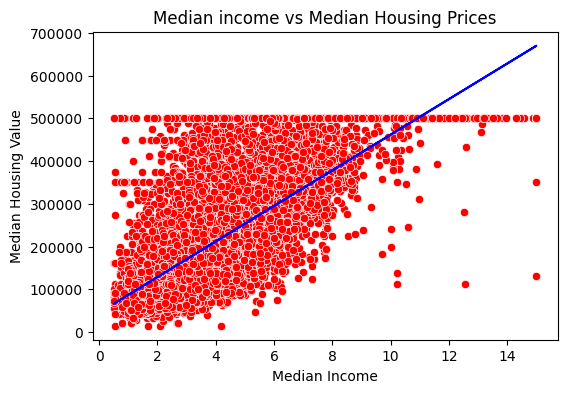

In [ ]:
plt.figure(figsize=(6,4))

# The actual training data values in scatter plot in red color
sns.scatterplot(x = x_train_actual, y = y_train, color = "red")

# Plot the line of regression for the training values using the y as predict output of the model
plt.plot(x_train_actual,lm_median_income.predict(x_train_median_income), color = "blue")

plt.title("Median income vs Median Housing Prices")
plt.xlabel("Median Income")
plt.ylabel("Median Housing Value")
plt.show()

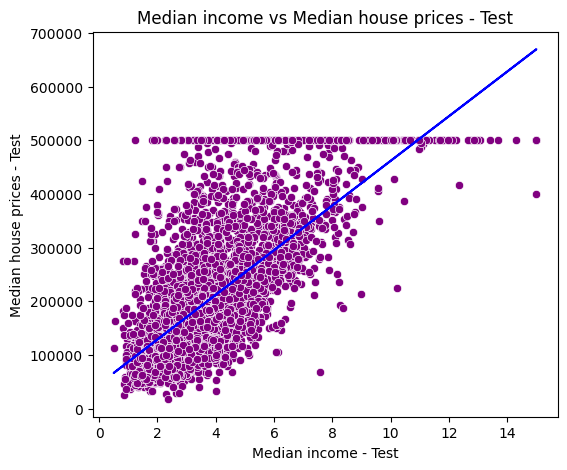

In [ ]:
plt.figure(figsize=(6,5))

# The actual testing data values in scatter plot in red color
sns.scatterplot(x = x_test_actual,y= y_test, color ="purple")

# Plot the line of regression for the testing values using the y as predict output - predicted_house_price_median_income
plt.plot(x_test_actual,predicted_house_price_median_income,color="blue")

plt.title("Median income vs Median house prices - Test")
plt.xlabel("Median income - Test")
plt.ylabel("Median house prices - Test")
plt.show()